## <font color = #FF0000>**Data Preparation**</font>

## <font color = #0e46a1>**Data Acquisition**</font>

#### <font color = #696969>**Import Libraries**</font>

In [1]:
import sys

print("Versión de Python:", sys.version)

Versión de Python: 3.10.6 (tags/v3.10.6:9c7b4bd, Aug  1 2022, 21:53:49) [MSC v.1932 64 bit (AMD64)]


In [2]:
import numpy     as np
import pandas    as pd
import seaborn   as sns
import geopandas as gpd

In [3]:
import matplotlib.pyplot as plt

In [4]:
from scipy            import stats
from datetime         import datetime
from shapely.geometry import Point

In [5]:
print("Versión de numpy     :", np.__version__)
print("Versión de pandas    :", pd.__version__)
print("Versión de seaborn   :", sns.__version__)
print("Versión de geopandas :", gpd.__version__)
print("Versión de matplotlib:", plt.matplotlib.__version__)

import scipy
import shapely


print("Versión de SciPy     :", scipy.__version__)
print("Versión de Shapely   :", shapely.__version__)

Versión de numpy     : 1.23.3
Versión de pandas    : 1.5.0
Versión de seaborn   : 0.12.2
Versión de geopandas : 0.14.1
Versión de matplotlib: 3.7.1
Versión de SciPy     : 1.9.1
Versión de Shapely   : 2.0.2


#### <font color = #696969>**Import the Data**</font>

In [6]:
Data = pd.read_csv(r"D:\Documentos\Tesis\Bases de Datos\Credit Card Dataset - Fraud Detection\Simulated Credit Card Transactions generated using Sparkov\fraudTrain.csv", parse_dates = ['trans_date_trans_time'])

#### <font color = #696969>**Preview the Data**</font>

In [7]:
Data.head()

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,0,2019-01-01 00:00:18,2703186189652095,"fraud_Rippin, Kub and Mann",misc_net,4.97,Jennifer,Banks,F,561 Perry Cove,...,36.0788,-81.1781,3495,"Psychologist, counselling",1988-03-09,0b242abb623afc578575680df30655b9,1325376018,36.011293,-82.048315,0
1,1,2019-01-01 00:00:44,630423337322,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,Stephanie,Gill,F,43039 Riley Greens Suite 393,...,48.8878,-118.2105,149,Special educational needs teacher,1978-06-21,1f76529f8574734946361c461b024d99,1325376044,49.159047,-118.186462,0
2,2,2019-01-01 00:00:51,38859492057661,fraud_Lind-Buckridge,entertainment,220.11,Edward,Sanchez,M,594 White Dale Suite 530,...,42.1808,-112.2620,4154,Nature conservation officer,1962-01-19,a1a22d70485983eac12b5b88dad1cf95,1325376051,43.150704,-112.154481,0
3,3,2019-01-01 00:01:16,3534093764340240,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.00,Jeremy,White,M,9443 Cynthia Court Apt. 038,...,46.2306,-112.1138,1939,Patent attorney,1967-01-12,6b849c168bdad6f867558c3793159a81,1325376076,47.034331,-112.561071,0
4,4,2019-01-01 00:03:06,375534208663984,fraud_Keeling-Crist,misc_pos,41.96,Tyler,Garcia,M,408 Bradley Rest,...,38.4207,-79.4629,99,Dance movement psychotherapist,1986-03-28,a41d7549acf90789359a9aa5346dcb46,1325376186,38.674999,-78.632459,0


## <font color = #0e46a1>**Data Exploration**</font>

#### <font color = #696969>**Missing Values**</font>

In [8]:
def Missing(DataFrame):
    
    NAN = pd.DataFrame(data = (DataFrame.isnull().sum()/len(Data))*100, columns = ['% Missing Values'])

    return NAN

In [9]:
NAN = Missing(Data)
NAN

,% Missing Values
Unnamed: 0,0.0
trans_date_trans_time,0.0
cc_num,0.0
merchant,0.0
category,0.0
amt,0.0
first,0.0
last,0.0
gender,0.0
street,0.0


#### <font color = #696969>**Data Description**</font>

In [10]:
Data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1296675 entries, 0 to 1296674
Data columns (total 23 columns):
 #   Column                 Non-Null Count    Dtype         
---  ------                 --------------    -----         
 0   Unnamed: 0             1296675 non-null  int64         
 1   trans_date_trans_time  1296675 non-null  datetime64[ns]
 2   cc_num                 1296675 non-null  int64         
 3   merchant               1296675 non-null  object        
 4   category               1296675 non-null  object        
 5   amt                    1296675 non-null  float64       
 6   first                  1296675 non-null  object        
 7   last                   1296675 non-null  object        
 8   gender                 1296675 non-null  object        
 9   street                 1296675 non-null  object        
 10  city                   1296675 non-null  object        
 11  state                  1296675 non-null  object        
 12  zip                    12966

In [11]:
Data.describe()

,Unnamed: 0,cc_num,amt,zip,lat,long,city_pop,unix_time,merch_lat,merch_long,is_fraud
count,1.296675e+06,1.296675e+06,1.296675e+06,1.296675e+06,1.296675e+06,1.296675e+06,1.296675e+06,1.296675e+06,1.296675e+06,1.296675e+06,1.296675e+06
mean,6.483370e+05,4.171920e+17,7.035104e+01,4.880067e+04,3.853762e+01,-9.022634e+01,8.882444e+04,1.349244e+09,3.853734e+01,-9.022646e+01,5.788652e-03
std,3.743180e+05,1.308806e+18,1.603160e+02,2.689322e+04,5.075808e+00,1.375908e+01,3.019564e+05,1.284128e+07,5.109788e+00,1.377109e+01,7.586269e-02
min,0.000000e+00,6.041621e+10,1.000000e+00,1.257000e+03,2.002710e+01,-1.656723e+02,2.300000e+01,1.325376e+09,1.902779e+01,-1.666712e+02,0.000000e+00
25%,3.241685e+05,1.800429e+14,9.650000e+00,2.623700e+04,3.462050e+01,-9.679800e+01,7.430000e+02,1.338751e+09,3.473357e+01,-9.689728e+01,0.000000e+00
50%,6.483370e+05,3.521417e+15,4.752000e+01,4.817400e+04,3.935430e+01,-8.747690e+01,2.456000e+03,1.349250e+09,3.936568e+01,-8.743839e+01,0.000000e+00
75%,9.725055e+05,4.642255e+15,8.314000e+01,7.204200e+04,4.194040e+01,-8.015800e+01,2.032800e+04,1.359385e+09,4.195716e+01,-8.023680e+01,0.000000e+00
max,1.296674e+06,4.992346e+18,2.894890e+04,9.978300e+04,6.669330e+01,-6.795030e+01,2.906700e+06,1.371817e+09,6.751027e+01,-6.695090e+01,1.000000e+00


In [12]:
Data.describe(include = ['object'])

,merchant,category,first,last,gender,street,city,state,job,dob,trans_num
count,1296675,1296675,1296675,1296675,1296675,1296675,1296675,1296675,1296675,1296675,1296675
unique,693,14,352,481,2,983,894,51,494,968,1296675
top,fraud_Kilback LLC,gas_transport,Christopher,Smith,F,0069 Robin Brooks Apt. 695,Birmingham,TX,Film/video editor,1977-03-23,0b242abb623afc578575680df30655b9
freq,4403,131659,26669,28794,709863,3123,5617,94876,9779,5636,1


In [13]:
Data['is_fraud'].sum()

7506

#### <font color = #696969>**Identify distinct values by feature**</font>

In [14]:
def Counter(DataFrame):
    
    C = DataFrame.apply(lambda x: len(x.unique()))
    
    return C

In [15]:
Counter = Counter(Data)
Counter

Unnamed: 0               1296675
trans_date_trans_time    1274791
cc_num                       983
merchant                     693
category                      14
amt                        52928
first                        352
last                         481
gender                         2
street                       983
city                         894
state                         51
zip                          970
lat                          968
long                         969
city_pop                     879
job                          494
dob                          968
trans_num                1296675
unix_time                1274823
merch_lat                1247805
merch_long               1275745
is_fraud                       2
dtype: int64

#### <font color = #696969>**Drop variables**</font>

In [16]:
Data.drop(['Unnamed: 0','cc_num','trans_num','unix_time'], axis = 1, inplace = True)

#### <font color = #696969>**Classes**</font>

In [17]:
print('No Frauds: ' , round(Data['is_fraud'].value_counts()[0]/len(Data) * 100,2), '% of the dataset')
print('   Frauds:  ', round(Data['is_fraud'].value_counts()[1]/len(Data) * 100,2), '% of the dataset')

No Frauds:  99.42 % of the dataset
   Frauds:   0.58 % of the dataset


## <font color = #0e46a1>**Generate Feature Matrix and Labels Array**</font>

#### <font color = #696969>**Create the feature matrix X and the labels array Y**</font>

In [18]:
XData = Data.copy().drop(['is_fraud'], axis = 1)
YData = Data['is_fraud'].copy()

In [19]:
XData.head()

,trans_date_trans_time,merchant,category,amt,first,last,gender,street,city,state,zip,lat,long,city_pop,job,dob,merch_lat,merch_long
0,2019-01-01 00:00:18,"fraud_Rippin, Kub and Mann",misc_net,4.97,Jennifer,Banks,F,561 Perry Cove,Moravian Falls,NC,28654,36.0788,-81.1781,3495,"Psychologist, counselling",1988-03-09,36.011293,-82.048315
1,2019-01-01 00:00:44,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,Stephanie,Gill,F,43039 Riley Greens Suite 393,Orient,WA,99160,48.8878,-118.2105,149,Special educational needs teacher,1978-06-21,49.159047,-118.186462
2,2019-01-01 00:00:51,fraud_Lind-Buckridge,entertainment,220.11,Edward,Sanchez,M,594 White Dale Suite 530,Malad City,ID,83252,42.1808,-112.2620,4154,Nature conservation officer,1962-01-19,43.150704,-112.154481
3,2019-01-01 00:01:16,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.00,Jeremy,White,M,9443 Cynthia Court Apt. 038,Boulder,MT,59632,46.2306,-112.1138,1939,Patent attorney,1967-01-12,47.034331,-112.561071
4,2019-01-01 00:03:06,fraud_Keeling-Crist,misc_pos,41.96,Tyler,Garcia,M,408 Bradley Rest,Doe Hill,VA,24433,38.4207,-79.4629,99,Dance movement psychotherapist,1986-03-28,38.674999,-78.632459


### Matrix X: Time

#### <font color = #696969>**Preview**</font>

In [20]:
def Time(DataFrame):
    
    T = DataFrame.loc[:,['trans_date_trans_time']]
    T = np.array(T)   
    
    T = [str(T[i]) for i in range(0,len(T))]
    T = np.array(T)
    
    B = DataFrame.loc[:,['dob']]
    B = np.array(B)
    
    B = [str(B[i]) for i in range(0,len(B))]
    B = np.array(B)
    
    
    TY = [T[i][2:6] for i in range(0,len(T))]
    TY = np.array(TY)
       
    TM = [T[i][7:9] for i in range(0,len(T))]
    TM = np.array(TM)
        
    CY = [B[i][2:6] for i in range(0,len(B))]
    CY = np.array(CY)
    
    CM = [B[i][7:9] for i in range(0,len(B))]
    CM = np.array(CM)
    
    TY = pd.DataFrame(data = TY)
    TM = pd.DataFrame(data = TM)
    CY = pd.DataFrame(data = CY)
    CM = pd.DataFrame(data = CM)
        
    Time = pd.concat([TY, TM, CY, CM], axis = 1, ignore_index = True)
    
    Time.columns = ['Transaction Year', 'Transaction Month', 'Customer Year', 'Customer Month']
    
    Time['Transaction Year']  = Time['Transaction Year'].astype(int)
    Time['Transaction Month'] = Time['Transaction Month'].astype(int)
    Time['Customer Year']     = Time['Customer Year'].astype(int)
    Time['Customer Month']    = Time['Customer Month'].astype(int)
      
    return Time

In [21]:
Time = Time(XData)
Time

,Transaction Year,Transaction Month,Customer Year,Customer Month
0,2019,1,1988,3
1,2019,1,1978,6
2,2019,1,1962,1
3,2019,1,1967,1
4,2019,1,1986,3
...,...,...,...,...
1296670,2020,6,1961,11
1296671,2020,6,1979,12
1296672,2020,6,1967,8
1296673,2020,6,1980,8


In [22]:
def Counter(DataFrame):
    
    C = DataFrame.apply(lambda x: len(x.unique()))
    
    return C

In [23]:
Counter = Counter(Time)
Counter

Transaction Year      2
Transaction Month    12
Customer Year        81
Customer Month       12
dtype: int64

In [24]:
Actual   = datetime.now().year
Birthday = Time['Customer Year'].copy()

In [25]:
Birthday['Age'] = Actual - Birthday

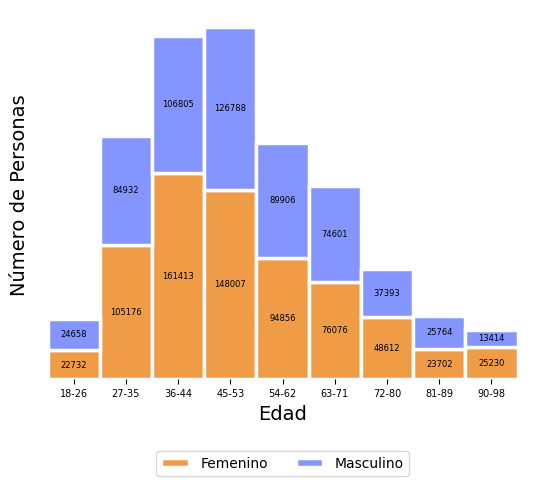

In [26]:
bins = range(17, 100, 9)

Birthday['Age Group'] = pd.cut(Birthday['Age'], bins = bins, right = False, labels = [f'{i+1}-{i+9}' for i in bins[:-1]])

table = pd.crosstab(Birthday['Age Group'], Data['gender'])

ax    = table.plot(kind = 'bar', width = 1, color = ['#f09b46', '#8595ff', 'white'], edgecolor = 'white', stacked = True)

for idx, container in enumerate(ax.containers):
    for i, child in enumerate(container.patches):
        
        height = child.get_height()
        width  = child.get_width()
        

        child.set_edgecolor('white')
        child.set_linewidth(2.5)
        
        ax.annotate(f'{int(height)}', 
                    xy = (child.get_x() + width / 2, child.get_y() + height / 2),
                    xytext = (0, 0),
                    textcoords = "offset points",
                    ha = 'center', va='center',
                    fontsize = 6, color = 'black')

plt.xticks(rotation = 0, color = 'black', fontsize = 7)

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['left'].set_visible(False)
        
plt.xlabel('Edad', fontdict = {'size': 14, 'color': 'black'})
plt.ylabel('Número de Personas', fontdict = {'size': 14, 'color': 'black'})

legend = plt.legend(['Femenino', 'Masculino'], bbox_to_anchor=(0.5, -0.28), loc = 'lower center', ncol = 2)

ax.set_yticks([])
plt.savefig('Personas - Edad.png', bbox_inches = 'tight')
plt.show()

In [27]:
Birthday['Age'] = Birthday['Age'].to_frame()
Birthday['Age'].describe()

,Customer Year
count,1.296675e+06
mean,5.074255e+01
std,1.737848e+01
min,1.900000e+01
25%,3.700000e+01
50%,4.900000e+01
75%,6.200000e+01
max,1.000000e+02


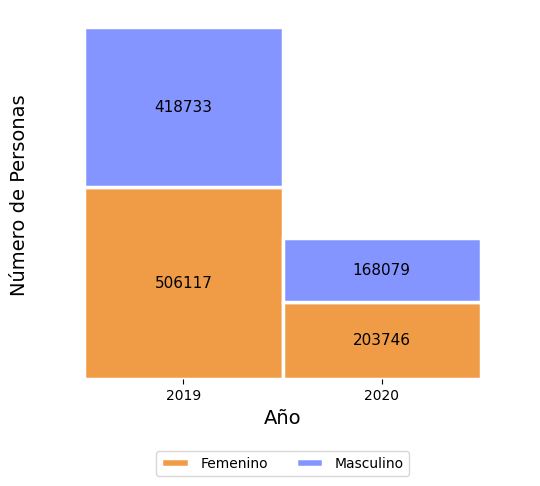

In [28]:
table = pd.crosstab(Time['Transaction Year'], Data['gender'])

ax    = table.plot(kind = 'bar', width = 1, color = ['#f09b46', '#8595ff', 'white'], edgecolor = 'white', stacked = True)

for idx, container in enumerate(ax.containers):
    for i, child in enumerate(container.patches):
        
        height = child.get_height()
        width  = child.get_width()
        

        child.set_edgecolor('white')
        child.set_linewidth(2.5)
        
        ax.annotate(f'{int(height)}', 
                    xy = (child.get_x() + width / 2, child.get_y() + height / 2),
                    xytext = (0, 0),
                    textcoords = "offset points",
                    ha = 'center', va ='center',
                    fontsize = 11, color = 'black')

plt.xticks(rotation = 0, color = 'black', fontsize = 10)

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['left'].set_visible(False)
        
plt.xlabel('Año', fontdict = {'size': 14, 'color': 'black'})
plt.ylabel('Número de Personas', fontdict = {'size': 14, 'color': 'black'})

legend = plt.legend(['Femenino', 'Masculino'], bbox_to_anchor=(0.5, -0.28), loc = 'lower center', ncol = 2)

ax.set_yticks([])
plt.savefig('Personas - Año.png', bbox_inches = 'tight')
plt.show()

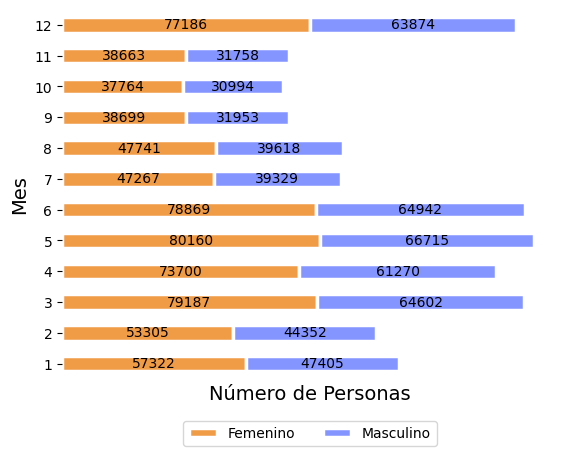

In [29]:
table = pd.crosstab(Time['Transaction Month'], Data['gender'])
ax    = table.plot(kind = 'barh', color = ['#f09b46', '#8595ff', 'white'], edgecolor = 'white', stacked = True)

for idx, container in enumerate(ax.containers):
    for i, child in enumerate(container.patches):
        
        height = child.get_height()
        width  = child.get_width()

        child.set_edgecolor('white')
        child.set_linewidth(2.5)
        
        ax.annotate(f'{int(width)}', 
                    xy = (child.get_x() + width / 2, child.get_y() + height / 2),
                    xytext = (0, 0),
                    textcoords = "offset points",
                    ha = 'center', va='center',
                    fontsize = 10, color = 'black')

plt.yticks(rotation = 0, color = 'black', fontsize = 10)

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['left'].set_visible(False)


plt.xlabel('Número de Personas', fontdict = {'size': 14, 'color': 'black'})
plt.ylabel('Mes', fontdict = {'size': 14, 'color': 'black'})

legend = plt.legend(['Femenino', 'Masculino'], bbox_to_anchor = (0.5,-0.2), loc = 'lower center', ncol = 2)

ax.set_xticks([])

plt.savefig('Personas - Mes.png', bbox_inches = 'tight')
plt.show()

### Matrix X: Numerical

#### <font color = #696969>**Preview**</font>

In [30]:
def Numerical(DataFrame):
    
    N = DataFrame.loc[:,['amt','zip','lat','long','city_pop','merch_lat','merch_long']]
    N = np.array(N)
    
    Numerical = pd.DataFrame(N)
    Numerical.columns = ['Amount', 'Postal Code', 'Latitude', 'Longitude', 'Population City', 'Merch Lat', 'Merch Long']

    return Numerical

In [31]:
Numerical = Numerical(XData)
Numerical

,Amount,Postal Code,Latitude,Longitude,Population City,Merch Lat,Merch Long
0,4.97,28654.0,36.0788,-81.1781,3495.0,36.011293,-82.048315
1,107.23,99160.0,48.8878,-118.2105,149.0,49.159047,-118.186462
2,220.11,83252.0,42.1808,-112.2620,4154.0,43.150704,-112.154481
3,45.00,59632.0,46.2306,-112.1138,1939.0,47.034331,-112.561071
4,41.96,24433.0,38.4207,-79.4629,99.0,38.674999,-78.632459
...,...,...,...,...,...,...,...
1296670,15.56,84735.0,37.7175,-112.4777,258.0,36.841266,-111.690765
1296671,51.70,21790.0,39.2667,-77.5101,100.0,38.906881,-78.246528
1296672,105.93,88325.0,32.9396,-105.8189,899.0,33.619513,-105.130529
1296673,74.90,57756.0,43.3526,-102.5411,1126.0,42.788940,-103.241160


In [32]:
Path = "D:/Documentos/Tesis/Códigos/tl_2020_us_state/tl_2020_us_state.shp"

Geomap     = gpd.read_file(Path)
Geomap.crs = "EPSG:4326"

In [33]:
Geomap.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 56 entries, 0 to 55
Data columns (total 15 columns):
 #   Column    Non-Null Count  Dtype   
---  ------    --------------  -----   
 0   REGION    56 non-null     object  
 1   DIVISION  56 non-null     object  
 2   STATEFP   56 non-null     object  
 3   STATENS   56 non-null     object  
 4   GEOID     56 non-null     object  
 5   STUSPS    56 non-null     object  
 6   NAME      56 non-null     object  
 7   LSAD      56 non-null     object  
 8   MTFCC     56 non-null     object  
 9   FUNCSTAT  56 non-null     object  
 10  ALAND     56 non-null     int64   
 11  AWATER    56 non-null     int64   
 12  INTPTLAT  56 non-null     object  
 13  INTPTLON  56 non-null     object  
 14  geometry  56 non-null     geometry
dtypes: geometry(1), int64(2), object(12)
memory usage: 6.7+ KB


In [34]:
geometry = [Point(xy) for xy in zip(Numerical['Longitude'], Numerical['Latitude'])]

gdf      = gpd.GeoDataFrame(Numerical, geometry = geometry, crs = "EPSG:4326")
gdf      = gdf.to_crs(Geomap.crs)

joined   = gpd.sjoin(gdf, Geomap, how = "left", predicate = 'within')

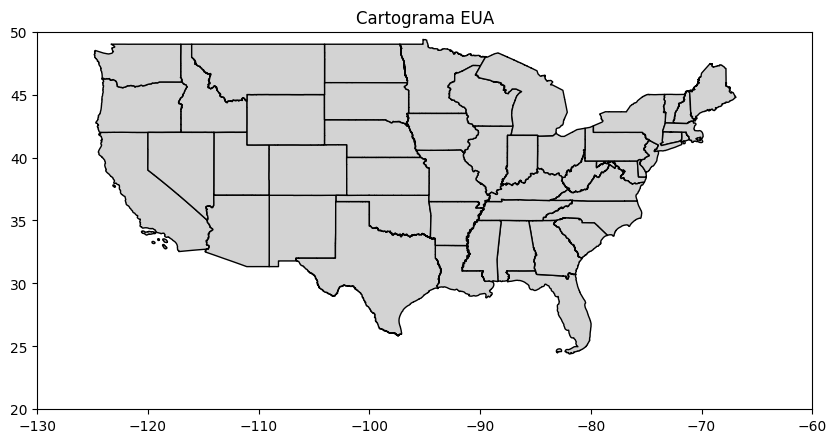

In [35]:
fig, ax = plt.subplots(figsize = (10, 8))

Geomap.plot(ax = ax, color = 'lightgrey', edgecolor = 'black')

ax.set_xlim(-130, -60)
ax.set_ylim(20, 50)

plt.title('Cartograma EUA')
plt.show()

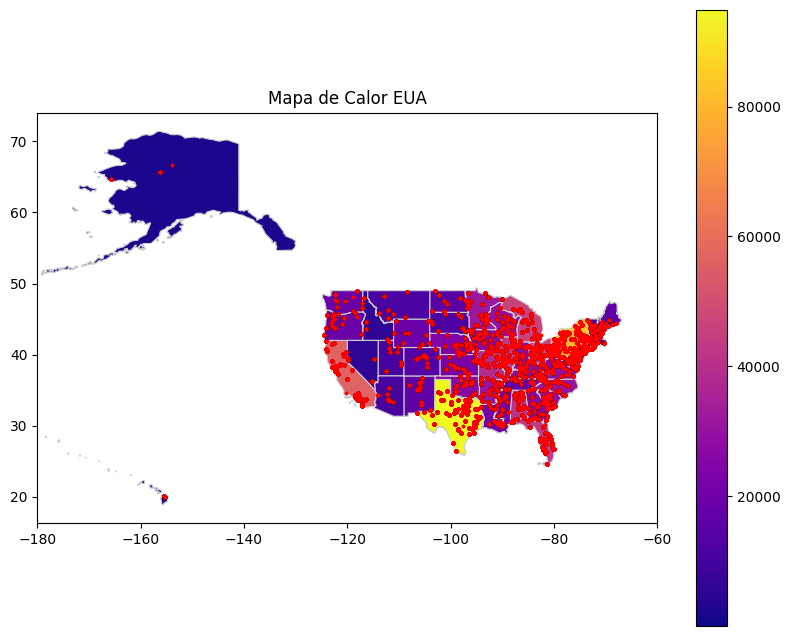

In [36]:
frecuencia_por_estado = joined.groupby('STUSPS').size().reset_index(name='Frecuencia')

Geomap_frecuencia = Geomap.merge(frecuencia_por_estado, left_on = 'STUSPS', right_on = 'STUSPS')
Geomap_frecuencia = gpd.GeoDataFrame(Geomap_frecuencia, geometry = 'geometry', crs = Geomap.crs)

fig, ax = plt.subplots(figsize = (10, 8))

Geomap_frecuencia.plot(ax = ax, column = 'Frecuencia', cmap = 'plasma', linewidth = 0.8, edgecolor = '0.8', legend = True)

joined.plot(ax = ax, marker = 'o', markersize = 2, alpha = 0.5, color = 'red')

ax.set_xlim(-180, -60)

plt.title('Mapa de Calor EUA')
plt.show()

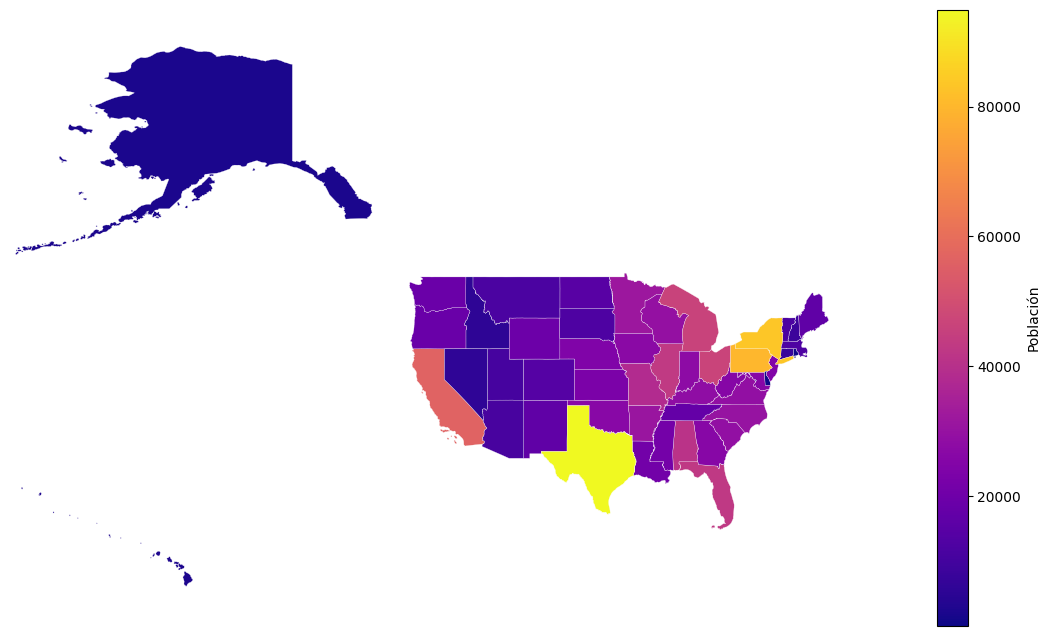

In [37]:
frecuencia    = Geomap.merge(frecuencia_por_estado, left_on = 'STUSPS', right_on = 'STUSPS')
df_frecuencia = gpd.GeoDataFrame(frecuencia, geometry = 'geometry', crs = Geomap.crs)

fig, ax = plt.subplots(figsize = (15, 8))

Geomap_frecuencia.plot(ax = ax, column = 'Frecuencia', cmap = 'plasma', linewidth = 0.2, edgecolor = '0.99', legend = True)

ax.set_xlim(-180, -60)
ax.set_ylim(15, 75)

ax.set_xticks([])
ax.set_yticks([])

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['left'].set_visible(False)

cbar = ax.get_figure().get_axes()[1]
cbar.set_ylabel('Población')

plt.savefig('Titulares EUA.png', bbox_inches = 'tight')
plt.show()

In [38]:
Geomap_frecuencia_sorted = Geomap_frecuencia[['STUSPS', 'Frecuencia']].sort_values(by = 'Frecuencia', ascending = False)
print(Geomap_frecuencia_sorted)

   STUSPS  Frecuencia
25     TX       94876
35     NY       83501
18     PA       79847
13     CA       56360
24     OH       46480
38     MI       46154
2      IL       43252
1      FL       42671
22     AL       40989
41     MO       38403
3      MN       31714
39     AR       31127
8      NC       30266
15     WI       29368
47     VA       29250
27     SC       29190
33     KY       28475
44     IN       27580
49     IA       26985
28     OK       26671
4      MD       26193
21     GA       26063
0      WV       25691
14     NJ       24603
17     NE       24168
43     KS       22996
40     MS       21188
20     LA       20965
30     WY       19322
19     WA       18924
16     OR       18597
29     TN       17554
34     ME       16505
12     NM       16407
32     ND       14786
26     CO       13880
46     MA       12376
45     SD       12324
9      VT       11768
42     MT       11754
50     AZ       10770
23     UT       10699
7      NH        8278
10     CT        7702
36     NV 

In [39]:
geometry = [Point(xy) for xy in zip(Numerical['Merch Long'], Numerical['Merch Lat'])]

gdf = gpd.GeoDataFrame(Numerical, geometry = geometry, crs = "EPSG:4326")
gdf = gdf.to_crs(Geomap.crs)

joined = gpd.sjoin(gdf, Geomap, how = "left", predicate = 'within')

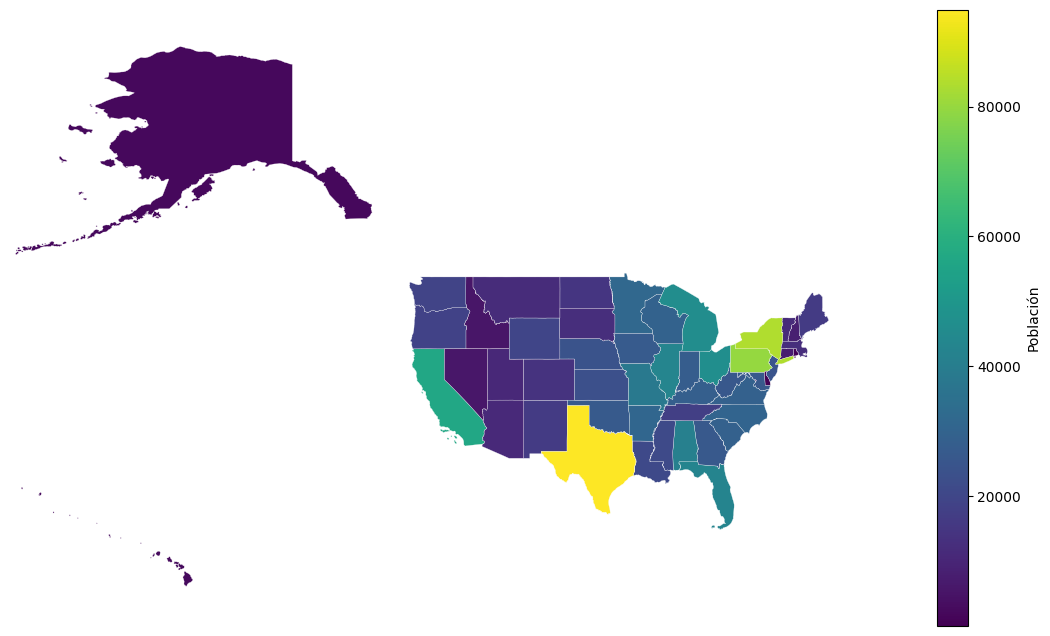

In [40]:
frecuencia = Geomap.merge(frecuencia_por_estado, left_on = 'STUSPS', right_on = 'STUSPS')
Geomap_frecuencia = gpd.GeoDataFrame(frecuencia, geometry = 'geometry', crs = Geomap.crs)

fig, ax = plt.subplots(figsize = (15, 8))

Geomap_frecuencia.plot(ax = ax, column = 'Frecuencia', cmap = 'viridis', linewidth = 0.2, edgecolor = '0.99', legend = True)

ax.set_xlim(-180, -60)
ax.set_ylim(15, 75)

ax.set_xticks([])
ax.set_yticks([])

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['left'].set_visible(False)

cbar = ax.get_figure().get_axes()[1]
cbar.set_ylabel('Población')

plt.savefig('Transacción EUA.png', bbox_inches = 'tight')
plt.show()

### Matrix X: Categorical

#### <font color = #696969>**Preview**</font>

In [41]:
def Categorical(DataFrame):
    
    C = DataFrame.loc[:,['category','gender','state','job']]
    C = np.array(C)
    
    Categorical = pd.DataFrame(C)
    Categorical.columns = ['Category', 'Gender', 'State', 'Occupation']
    
    return Categorical

In [42]:
Categorical = Categorical(XData)
Categorical

,Category,Gender,State,Occupation
0,misc_net,F,NC,"Psychologist, counselling"
1,grocery_pos,F,WA,Special educational needs teacher
2,entertainment,M,ID,Nature conservation officer
3,gas_transport,M,MT,Patent attorney
4,misc_pos,M,VA,Dance movement psychotherapist
...,...,...,...,...
1296670,entertainment,M,UT,Geoscientist
1296671,food_dining,M,MD,"Production assistant, television"
1296672,food_dining,M,NM,Naval architect
1296673,food_dining,M,SD,Volunteer coordinator


#### <font color = #696969>**Replace Labels**</font>

In [43]:
def Replace(Categorical):
    
    V01 = ['AK','HI','WA','ID','MT','OR','WY','CA','NV','UT','CO']
    L01 = 'West'
    
    V02 = ['ND','SD','NE','KS','MN','IA','MO','WI','IL','MI','IN','OH']
    L02 = 'Midwest'
    
    V03 = ['ME','VT','NH','NY','MA','PA','RI','CT','NJ']
    L03 = 'Northeast'
    
    V04 = ['AZ','NM','TX','OK']
    L04 = 'Southwest'
    
    V05 = ['AR','LA','MS','TN','AL','KY','GA','WV','FL','SC','NC','VA','DE','MD','DC']
    L05 = 'Southeast'

    V06 = ['Administrator', 'Administrator, arts', 'Administrator, charities/voluntary organisations', 'Administrator, education',
           'Administrator, local government', 'Buyer, industrial', 'Buyer, retail', 'Charity fundraiser', 'Charity officer',
           'Chartered accountant', 'Chartered legal executive (England and Wales)', 'Chartered loss adjuster', 
           'Chartered public finance accountant', 'Chief Executive Officer', 'Chief Financial Officer', 'Chief Marketing Officer',
           'Chief Operating Officer', 'Chief Strategy Officer', 'Chief Technology Officer', 'Chief of Staff', 'Claims inspector/assessor',
           'Civil Service administrator', 'Company secretary', 'Comptroller', 'Contractor', 'Dealer', 'Emergency planning/management officer',
           'Energy manager', 'Health and safety adviser', 'Health service manager', 'Human resources officer', 'Information officer',
           'Information systems manager', 'Legal secretary', 'Local government officer', 'Logistics and distribution manager',
           'Location manager', 'Management consultant', 'Medical secretary', 'Operational researcher', 'Personnel officer',
           'Politician\'s assistant', 'Product manager', 'Public house manager', 'Purchasing manager', 'Restaurant manager, fast food',
           'Secretary/administrator', 'Trading standards officer'] 
    L06 = 'Administration, business and management'

    V07 = ['Acupuncturist', 'Herbalist', 'Homeopath', 'Music therapist', 'Osteopath', 'Phytotherapist', 'Therapist, art',
           'Therapist, drama', 'Therapist, horticultural', 'Therapist, music', 'Therapist, occupational', 'Therapist, sports']
    L07 = 'Alternative therapies'

    V08 = ['Agricultural consultant', 'Animal nutritionist', 'Animal technologist', 'Amenity horticulturist', 'Arboriculturist',
           'Commercial horticulturist', 'Ecologist', 'Environmental consultant', 'Environmental health practitioner', 'Environmental manager',
           'Farm manager', 'Fisheries officer', 'Forest/woodland manager', 'Gaffer', 'Horticultural consultant', 'Horticultural therapist',
           'Horticulturist, commercial', 'Land', 'Nature conservation officer', 'Oceanographer', 'Plant breeder/geneticist',
           'Rural practice surveyor', 'Tree surgeon', 'Veterinary surgeon', 'Warden/ranger']
    L08 = 'Animals, land and environment'

    V09 = ['Applications developer', 'Database administrator', 'IT consultant', 'IT trainer', 'Network engineer', 'Software engineer',
           'Systems analyst', 'Systems developer', 'Web designer']
    L09 = 'Computing and ICT'

    V10 = ['Architect', 'Architectural technologist', 'Building control surveyor', 'Building surveyor', 'Civil engineer, contracting',
           'Commercial/residential surveyor', 'Conservation officer, historic buildings', 'Land/geomatics surveyor', 'Landscape architect',
           'Quantity surveyor', 'Quarry manager', 'Sub', 'Structural engineer', 'Town planner']
    L10 = 'Construction and building'

    V11 = ['Animator', 'Art gallery manager', 'Ceramics designer', 'Color technologist', 'Colour technologist', 'Designer, ceramics/pottery',
           'Designer, exhibition/display', 'Designer, furniture', 'Designer, industrial/product', 'Designer, interior/spatial',
           'Designer, jewelry', 'Designer, jewellery', 'Designer, multimedia', 'Designer, television/film set', 'Designer, textile',
           'Editor, commissioning', 'Editor, film/video', 'Editor, magazine features', 'Exhibition designer', 'Exhibitions officer, museum/gallery',
           'Film/video editor', 'Fine artist', 'Furniture conservator/restorer', 'Furniture designer', 'Glass blower/designer',
           'Historic buildings inspector/conservation officer', 'Illustrator', 'Industrial/product designer', 'Interior and spatial designer',
           'Jewelry designer', 'Jewellery designer', 'Multimedia programmer', 'Product designer', 'Programmer researcher, broadcasting/film/video',
           'Programme researcher, broadcasting/film/video', 'Programmer, applications', 'Programmer, multimedia', 'Set designer',
           'Special effects artist', 'Textile designer']
    L11 = 'Design, arts and crafts'

    V12 = ['Associate Professor', 'Careers adviser', 'Community education officer', 'Early years teacher', 'Education administrator',
           'Education officer, community', 'Education officer, museum', 'Educational psychologist', 'English as a foreign language teacher',
           'English as a second language teacher', 'Higher education careers adviser', 'Further education lecturer', 'Learning mentor',
           'Lecturer, further education', 'Lecturer, higher education', 'Primary school teacher', 'Private music teacher', 'Secondary school teacher',
           'Special educational needs teacher', 'Teacher, English as a foreign language', 'Teacher, adult education', 'Teacher, early years/pre',
           'Teacher, primary school', 'Teacher, secondary school', 'Teacher, special educational needs', 'Teaching laboratory technician',
           'TEFL teacher', 'Training and development officer']
    L12 = 'Education and training'

    V13 = ['Aeronautical engineer', 'Biomedical engineer', 'Building services engineer', 'Chemical engineer', 'Clothing/textile technologist',
           'Communications engineer', 'Contracting civil engineer', 'Drilling engineer', 'Electrical engineer', 'Electronics engineer',
           'Energy engineer', 'Engineer, aeronautical', 'Engineer, agricultural', 'Engineer, automotive', 'Engineer, biomedical',
           'Engineer, broadcasting (operations)', 'Engineer, building services', 'Engineer, civil (consulting)', 'Engineer, civil (contracting)',
           'Engineer, communications', 'Engineer, control and instrumentation', 'Engineer, drilling', 'Engineer, electronics', 'Engineer, land',
           'Engineer, maintenance', 'Engineer, manufacturing', 'Engineer, materials', 'Engineer, mining', 'Engineer, petroleum',
           'Engineer, production', 'Engineer, site', 'Engineer, structural', 'Engineer, technical sales', 'Engineer, water', 'Engineering geologist',
           'Field seismologist', 'Geologist, engineering', 'Hydrographic surveyor', 'Maintenance engineer', 'Manufacturing engineer',
           'Manufacturing systems engineer', 'Materials engineer', 'Mechanical engineer', 'Metallurgist', 'Minerals surveyor',
           'Mining engineer', 'Naval architect', 'Petroleum engineer', 'Site engineer', 'Surveyor, hydrographic', 'Surveyor, land/geomatics',
           'Surveyor, minerals', 'Surveyor, mining', 'Surveyor, rural practice', 'Water engineer', 'Wellsite geologist']
    L13 = 'Engineering'

    V14 = ['Civil Service fast streamer', 'Facilities manager', 'Industrial buyer', 'Make', 'Occupational hygienist', 'Planning and development surveyor',
           'Retail buyer', 'Seismic interpreter']
    L14 = 'Facilities and property services'

    V15 = ['Accountant, chartered', 'Accountant, chartered certified', 'Accountant, chartered public finance', 'Accounting technician',
           'Air broker', 'Corporate investment banker', 'Economist', 'Equities trader', 'Financial adviser', 'Financial trader',
           'Insurance broker', 'Insurance claims handler', 'Insurance risk surveyor', 'Insurance underwriter', 'Investment analyst',
           'Investment banker, corporate', 'Investment banker, operational', 'Loss adjuster, chartered', 'Medical sales representative',
           'Merchandiser, retail', 'Operational investment banker', 'Pension scheme manager', 'Pensions consultant', 'Retail banker',
           'Risk analyst', 'Tax adviser', 'Tax inspector', 'Trade mark attorney']
    L15 = 'Financial services'

    V16 = ['Licensed conveyancer']
    L16 = 'Garage services'

    V17 = ['Ambulance person', 'Art therapist', 'Audiological scientist', 'Chiropodist', 'Clinical biochemist', 'Clinical cytogeneticist',
           'Clinical psychologist', 'Clinical research associate', 'Dance movement psychotherapist', 'Diagnostic radiographer',
           'Doctor, general practice', 'Doctor, hospital', 'Dispensing optician', 'Embryologist, clinical', 'Exercise physiologist',
           'Forensic psychologist', 'General practice doctor', 'Health physicist', 'Health promotion specialist', 'Health visitor',
           'Hospital doctor', 'Hospital pharmacist', 'Immunologist', 'Learning disability nurse', 'Medical physicist', 'Medical technical officer',
           'Mental health nurse', 'Neurosurgeon', 'Nurse, childrens', 'Nurse, children\'s', 'Nurse, mental health', 'Nutritional therapist',
           'Occupational therapist', 'Oncologist', 'Optician, dispensing', 'Optometrist', 'Orthoptist', 'Paediatric nurse', 'Pediatric nurse',
           'Paramedic', 'Pathologist', 'Pharmacist, community', 'Pharmacist, hospital', 'Pharmacologist', 'Physicist, medical',
           'Physiotherapist', 'Podiatrist', 'Psychiatric nurse', 'Psychiatrist', 'Psychologist, clinical', 'Radiographer, diagnostic',
           'Radiographer, therapeutic', 'Surgeon']
    L17 = 'Healthcare'

    V18 = ['Academic librarian', 'Archaeologist', 'Archivist', 'Conservator, furniture', 'Conservator, museum/gallery', 'Copy',
           'Copywriter, advertising', 'Librarian, academic', 'Librarian, public', 'Museum education officer', 'Museum/gallery conservator',
           'Museum/gallery exhibitions officer', 'Public librarian', 'Science writer']
    L18 = 'Heritage, culture and libraries'

    V19 = ['Air cabin crew', 'Barista', 'Call centre manager', 'Catering manager', 'Community pharmacist', 'Environmental education officer',
           'Equality and diversity officer', 'Event organiser', 'Fitness centre manager', 'Hotel manager', 'Leisure centre manager',
           'Theme Park manager', 'Theme park manager', 'Tour manager', 'Tourist information center manager', 'Tourist information centre manager', 'Travel agency manager']
    L19 = 'Hospitality, catering and tourism'

    V20 = ['Interpreter','Lexicographer']
    L20 = 'Languages'

    V21 = ['Advice worker', 'Barrister', 'Barristers clerk', 'Barrister\'s clerk', 'Futures trader', 'Heritage manager', 'Lawyer',
           'Patent attorney', 'Politicians assistant', 'Probation officer', 'Public affairs consultant', 'Race relations officer',
           'Records manager', 'Regulatory affairs officer', 'Senior tax professional/tax inspector', 'Solicitor', 'Solicitor, Scotland', 'Trademark attorney']
    L21 = 'Legal and court services'

    V22 = ['Development worker, international aid', 'Garment/textile technologist', 'Operations geologist', 'Production manager',
           'Ship broker', 'Technical brewer']
    L22 = 'Manufacturing and production'

    V23 = ['None']
    L23 = 'Other'

    V24 = ['Artist', 'Arts development officer', 'Broadcast engineer', 'Broadcast journalist', 'Broadcast presenter', 'Camera operator',
           'Community arts worker', 'Control and instrumentation engineer', 'Dancer', 'Music tutor', 'Musician', 'Presenter, broadcasting',
           'Producer, radio', 'Producer, television/film/video', 'Production assistant, radio', 'Production assistant, television',
           'Production engineer', 'Radio broadcast assistant', 'Radio producer', 'Stage manager', 'Telecommunications researcher',
           'Television camera operator', 'Television floor manager', 'Television production assistant', 'Television/film/video producer',
           'Theatre director', 'Theatre manager']
    L24 = 'Performing arts and media'

    V25 = ['Advertising account executive', 'Advertising account planner', 'Advertising copywriter', 'Commissioning editor', 'Event organizer',
           'Journalist, newspaper', 'Magazine features editor', 'Magazine journalist', 'Market researcher', 'Marketing executive',
           'Media buyer', 'Media planner', 'Press photographer', 'Press sub', 'Public relations account executive', 'Public relations officer',
           'Video editor', 'Writer']
    L25 = 'Print and publishing, marketing and advertising'

    V26 = ['Bookseller', 'Call center manager', 'Estate manager/land agent', 'Retail manager', 'Retail merchandiser', 'Sales executive',
           'Sales professional, IT', 'Sales promotion account executive', 'Tourism officer', 'Transport planner', 'Visual merchandiser',
           'Waste management officer']
    L26 = 'Retail and customer services'

    V27 = ['Analytical chemist', 'Biochemist, clinical', 'Biomedical scientist', 'Cartographer', 'Chemist, analytical', 'Cytogeneticist',
           'Data scientist', 'Geneticist, molecular', 'Geochemist', 'Geophysicist/field seismologist', 'Geoscientist', 'Geologist, wellsite',
           'Herpetologist', 'Hydrogeologist', 'Hydrologist', 'Physiological scientist', 'Product/process development scientist',
           'Research scientist (life sciences)', 'Research scientist (maths)', 'Research scientist (math’s)', 'Research scientist (medical)',
           'Research scientist (physical sciences)', 'Scientific laboratory technician', 'Scientist, audiological', 'Scientist, biomedical',
           'Scientist, clinical (histocompatibility and immunogenetics)', 'Scientist, marine', 'Scientist, physiological', 'Scientist, research (maths)',
           'Scientist, research (math’s)', 'Scientist, research (medical)', 'Scientist, research (physical sciences)', 'Soil scientist',
           'Statistician', 'Toxicologist', 'Water quality scientist']
    L27 = 'Science, mathematics and statistics'

    V28 = ['Armed forces coordination/support/administrative officer', 'Armed forces logistics/support/administrative officer',
           'Armed forces technical officer', 'Armed forces training and education officer', 'Cabin crew', 'Careers information officer',
           'Field trials officer', 'Firefighter', 'Immigration officer', 'Intelligence analyst', 'Police officer', 'Prison officer',
           'Research officer, political party', 'Research officer, trade union', 'Social research officer, government']
    L28 = 'Security, uniformed and protective services'

    V29 = ['Child psychotherapist', 'Counselling psychologist', 'Counsellor', 'Curator', 'Occupational psychologist', 'Professor Emeritus',
           'Psychologist, counselling', 'Psychologist, forensic', 'Psychologist, sport and exercise', 'Psychotherapist', 'Psychotherapist, child',
           'Sport and exercise psychologist', 'Sports administrator', 'Sports development officer']
    L29 = 'Social sciences and religion'

    V30 = ['Aid worker', 'Community development worker', 'Development worker, community', 'Mud logger', 'Mudlogger', 'Social researcher', 'Volunteer coordinator']
    L30 = 'Social work and caring services'

    V31 = ['Fitness center manager', 'Leisure center manager', 'Outdoor activities/education manager']
    L31 = 'Sport and leisure'

    V32 = ['Airline pilot', 'Air traffic controller', 'Freight forwarder', 'Pilot, airline', 'Warehouse manager']
    L32 = 'Transport, distribution and logistics'
    
    V33 = ['entertainment']
    L33 = 'Entertainment'
    
    V34 = ['food_dining']
    L34 = 'Food'
    
    V35 = ['gas_transport']
    L35 = 'Transporte'
    
    V36 = ['grocery_net']
    L36 = 'Grocery_Net'
    
    V37 = ['grocery_pos']
    L37 = 'Grocery_Pos'
    
    V38 = ['health_fitness']
    L38 = 'Health'
    
    V39 = ['home']
    L39 = 'Home'
    
    V40 = ['kids_pets']
    L40 = 'Kids Pets'
    
    V41 = ['misc_net']
    L41 = 'Misc_Net'
    
    V42 = ['misc_pos']
    L42 = 'Misc_Pos'
    
    V43 = ['personal_care']
    L43 = 'Personal Care'
    
    V44 = ['shopping_net']
    L44 = 'Shopping_Net'
    
    V45 = ['shopping_pos']
    L45 = 'Shopping_Pos'
    
    V46 = ['travel']
    L46 = 'Travel'

    Variables = [V01, V02, V03, V04, V05, V06, V07, V08, V09, V10, V11, V12, V13, V14, V15,
                 V16, V17, V18, V19, V20, V21, V22, V23, V24, V25, V26, V27, V28, V29, V30,
                 V31, V32, V33, V34, V35, V36, V37, V38, V39, V40, V41, V42, V43, V44, V45,
                 V46]
    Label     = [L01, L02, L03, L04, L05, L06, L07, L08, L09, L10, L11, L12, L13, L14, L15,
                 L16, L17, L18, L19, L20, L21, L22, L23, L24, L25, L26, L27, L28, L29, L30,
                 L31, L32, L33, L34, L35, L36, L37, L38, L39, L40, L41, L42, L43, L44, L45,
                 L46]
    
    for i in range(len(Variables)):
        Categorical = Categorical.replace(Variables[i], Label[i])
    
    return Categorical

In [44]:
Categorical = Replace(Categorical)
Categorical

,Category,Gender,State,Occupation
0,Misc_Net,F,Southeast,Social sciences and religion
1,Grocery_Pos,F,West,Education and training
2,Entertainment,M,West,"Animals, land and environment"
3,Transporte,M,West,Legal and court services
4,Misc_Pos,M,Southeast,Healthcare
...,...,...,...,...
1296670,Entertainment,M,West,"Science, mathematics and statistics"
1296671,Food,M,Southeast,Performing arts and media
1296672,Food,M,Southwest,Engineering
1296673,Food,M,Midwest,Social work and caring services


In [45]:
def Counter(DataFrame):
    
    C = DataFrame.apply(lambda x: len(x.unique()))
    
    return C

In [46]:
Counter = Counter(Categorical)
Counter

Category      14
Gender         2
State          5
Occupation    26
dtype: int64

#### <font color = #696969>**Get dummies variables**</font>

In [47]:
Categorical = pd.get_dummies(Categorical, dtype = int, drop_first = True)

In [48]:
Categorical.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1296675 entries, 0 to 1296674
Data columns (total 43 columns):
 #   Column                                                      Non-Null Count    Dtype
---  ------                                                      --------------    -----
 0   Category_Food                                               1296675 non-null  int32
 1   Category_Grocery_Net                                        1296675 non-null  int32
 2   Category_Grocery_Pos                                        1296675 non-null  int32
 3   Category_Health                                             1296675 non-null  int32
 4   Category_Home                                               1296675 non-null  int32
 5   Category_Kids Pets                                          1296675 non-null  int32
 6   Category_Misc_Net                                           1296675 non-null  int32
 7   Category_Misc_Pos                                           1296675 non-null  int

## <font color = #0e46a1>**Original Data**</font>

#### <font color = #696969>**Statistics**</font>

In [49]:
from scipy.stats import skew
from scipy.stats import kurtosis

In [50]:
def Statistics(Time, Numerical):
    
    Time = np.array(Time.loc[:])
        
    TM = np.mean(Time, axis = 0).round(3)
    TV = np.var(Time,  axis = 0).round(3)
    TT = np.std(Time,  axis = 0).round(3)
    TS = skew(Time, bias = True).round(3)
    TK = kurtosis(Time, bias = True).round(3)

    Time = pd.DataFrame([TM, TV, TT, TS, TK])
    
    Numerical = np.array(Numerical.loc[:])
    
    NM = np.mean(Numerical, axis = 0).round(3)
    NV = np.var(Numerical,  axis = 0).round(3)
    NT = np.std(Numerical,  axis = 0).round(3)
    NS = skew(Numerical, bias = True).round(3)
    NK = kurtosis(Numerical, bias = True).round(3)
    
    Numerical = pd.DataFrame([NM, NV, NT, NS, NK])
    
    Statistics = pd.concat([Time, Numerical], axis = 1, ignore_index = True)
    
    Statistics.columns = ['Transaction Year','Transaction Month','Customer Year','Customer Month','Amount', 'Postal Code', 'Latitude', 'Longitude', 'Population City', 'Merch Lat', 'Merch Long']
    
    Statistics.index = ['Mean','Variance','Standard Desviation', 'Skewness', 'Kurtosis']

    return Statistics

In [51]:
OStatistics = Statistics(Time, Numerical)
OStatistics

,Transaction Year,Transaction Month,Customer Year,Customer Month,Amount,Postal Code,Latitude,Longitude,Population City,Merch Lat,Merch Long
Mean,2019.287,6.142,1973.257,6.526,70.351,4.880067e+04,38.538,-90.226,8.882444e+04,38.537,-90.226
Variance,0.205,11.681,302.011,11.544,25701.212,7.232449e+08,25.764,189.312,9.117757e+10,26.110,189.643
Standard Desviation,0.452,3.418,17.378,3.398,160.316,2.689321e+04,5.076,13.759,3.019562e+05,5.110,13.771
Skewness,0.943,0.299,-0.612,-0.011,42.278,8.000000e-02,-0.186,-1.150,5.594000e+00,-0.182,-1.147
Kurtosis,-1.111,-1.048,-0.176,-1.187,4545.627,-1.096000e+00,0.813,1.856,3.761400e+01,0.796,1.848


#### <font color = #696969>**Concatenate Matrix X**</font>

In [52]:
OData = pd.concat([Time, Numerical, Categorical], axis = 1)
OData

,Transaction Year,Transaction Month,Customer Year,Customer Month,Amount,Postal Code,Latitude,Longitude,Population City,Merch Lat,...,Occupation_Manufacturing and production,Occupation_Performing arts and media,"Occupation_Print and publishing, marketing and advertising",Occupation_Retail and customer services,"Occupation_Science, mathematics and statistics","Occupation_Security, uniformed and protective services",Occupation_Social sciences and religion,Occupation_Social work and caring services,Occupation_Sport and leisure,"Occupation_Transport, distribution and logistics"
0,2019,1,1988,3,4.97,28654.0,36.0788,-81.1781,3495.0,36.011293,...,0,0,0,0,0,0,1,0,0,0
1,2019,1,1978,6,107.23,99160.0,48.8878,-118.2105,149.0,49.159047,...,0,0,0,0,0,0,0,0,0,0
2,2019,1,1962,1,220.11,83252.0,42.1808,-112.2620,4154.0,43.150704,...,0,0,0,0,0,0,0,0,0,0
3,2019,1,1967,1,45.00,59632.0,46.2306,-112.1138,1939.0,47.034331,...,0,0,0,0,0,0,0,0,0,0
4,2019,1,1986,3,41.96,24433.0,38.4207,-79.4629,99.0,38.674999,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1296670,2020,6,1961,11,15.56,84735.0,37.7175,-112.4777,258.0,36.841266,...,0,0,0,0,1,0,0,0,0,0
1296671,2020,6,1979,12,51.70,21790.0,39.2667,-77.5101,100.0,38.906881,...,0,1,0,0,0,0,0,0,0,0
1296672,2020,6,1967,8,105.93,88325.0,32.9396,-105.8189,899.0,33.619513,...,0,0,0,0,0,0,0,0,0,0
1296673,2020,6,1980,8,74.90,57756.0,43.3526,-102.5411,1126.0,42.788940,...,0,0,0,0,0,0,0,1,0,0


In [53]:
OData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1296675 entries, 0 to 1296674
Data columns (total 54 columns):
 #   Column                                                      Non-Null Count    Dtype  
---  ------                                                      --------------    -----  
 0   Transaction Year                                            1296675 non-null  int32  
 1   Transaction Month                                           1296675 non-null  int32  
 2   Customer Year                                               1296675 non-null  int32  
 3   Customer Month                                              1296675 non-null  int32  
 4   Amount                                                      1296675 non-null  float64
 5   Postal Code                                                 1296675 non-null  float64
 6   Latitude                                                    1296675 non-null  float64
 7   Longitude                                                   129

## <font color = #0e46a1>**Modified Data**</font>

#### <font color = #696969>**Normalization**</font>

In [54]:
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import QuantileTransformer

In [55]:
def Standard(Time):
    
    Standard = StandardScaler()
    
    Year = Standard.fit_transform(Time[['Transaction Year', 'Customer Year']])
    Year = pd.DataFrame(Year, columns = ['Transaction Year', 'Customer Year'])
    
    Month = Standard.fit_transform(Time[['Transaction Month', 'Customer Month']])
    Month = pd.DataFrame(Month, columns = ['Transaction Month', 'Customer Month'])
    
    Time = pd.concat([Year, Month], axis = 1, ignore_index = True)
    
    Time.columns = ['Transaction Year','Customer Year','Transaction Month','Customer Month']
    
    Reorder = ['Transaction Year','Transaction Month','Customer Year','Customer Month']
    
    Time = Time.reindex(columns = Reorder)
    
    return Time

In [56]:
def Quantile(Numerical):
    
    N = QuantileTransformer(n_quantiles = 200, output_distribution = 'normal', random_state = 0)
    
    Numerical = N.fit_transform(Numerical)
    Numerical = pd.DataFrame(Numerical, 
                             columns = ['Amount', 'Postal Code', 'Latitude', 'Longitude', 'Population City', 'Merch Lat', 'Merch Long'])
    
    return Numerical 

In [57]:
Time      = Standard(Time)
Numerical = Quantile(Numerical)

#### <font color = #696969>**Statistics**</font>

In [58]:
MStatistics = Statistics(Time, Numerical)
MStatistics

,Transaction Year,Transaction Month,Customer Year,Customer Month,Amount,Postal Code,Latitude,Longitude,Population City,Merch Lat,Merch Long
Mean,0.000,0.000,0.000,0.000,-0.005,0.001,-0.005,-0.009,0.008,-0.003,-0.006
Variance,1.000,1.000,1.000,1.000,1.000,1.049,1.021,1.052,1.089,1.001,0.996
Standard Desviation,1.000,1.000,1.000,1.000,1.000,1.024,1.010,1.026,1.044,1.001,0.998
Skewness,0.943,0.299,-0.612,-0.011,-0.041,-0.038,-0.146,0.031,0.177,-0.003,-0.036
Kurtosis,-1.111,-1.048,-0.176,-1.187,-0.028,1.332,0.624,1.334,2.134,-0.036,0.055


#### <font color = #696969>**Distribution**</font>

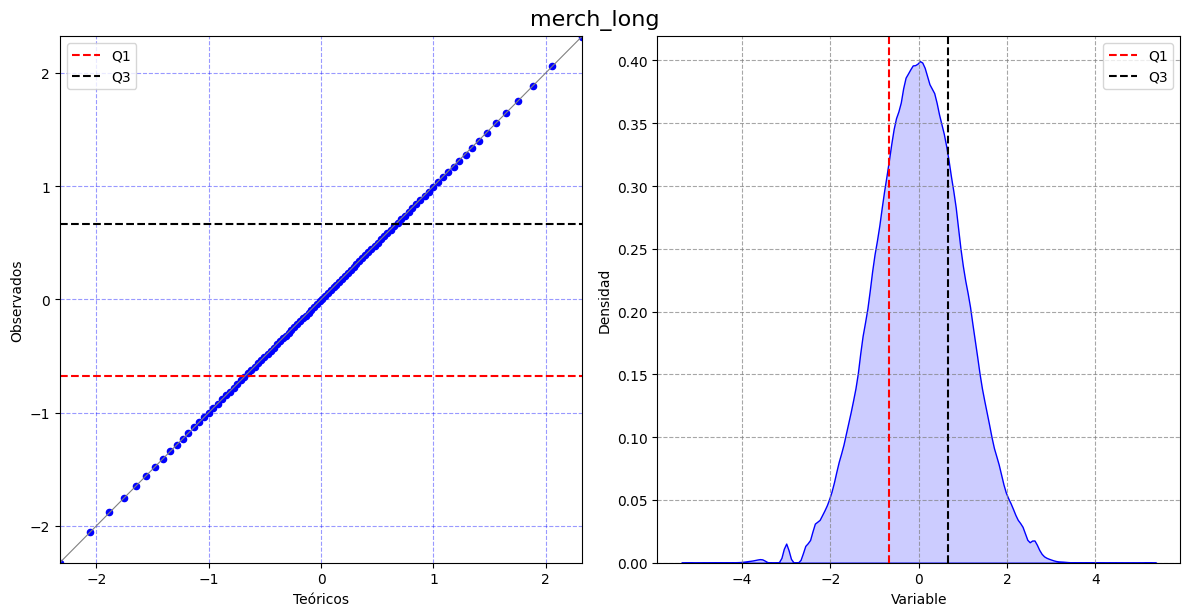

In [59]:
OBS = Numerical.sort_values(by='Merch Long')

teoricos   = stats.norm.ppf(np.linspace(0.01, 0.99, 100))
observados = OBS['Merch Long'].quantile(np.linspace(0.01, 0.99, 100))


plt.figure(figsize=(12, 6))


plt.subplot(1, 2, 1)
plt.scatter(teoricos, observados, color = 'blue', edgecolors = 'blue', s=20)
plt.plot([np.min(teoricos), np.max(teoricos)], [np.min(teoricos), np.max(teoricos)], color = 'gray', linewidth=0.8)


q25 = OBS['Merch Long'].quantile(0.25)
q75 = OBS['Merch Long'].quantile(0.75)
plt.axhline(q25, color = 'red',   linestyle = '--', label = 'Q1')
plt.axhline(q75, color = 'black', linestyle = '--', label = 'Q3')

plt.xlabel('Teóricos')
plt.ylabel('Observados')

plt.legend()
plt.grid(True, linestyle = '--', alpha = 0.4, color = 'blue', linewidth = 0.8)

lim_min = min(np.min(teoricos), np.min(observados))
lim_max = max(np.max(teoricos), np.max(observados))
plt.xlim(lim_min, lim_max)
plt.ylim(lim_min, lim_max)


plt.subplot(1, 2, 2)
sns.kdeplot(OBS['Merch Long'], color = 'blue', fill = True, alpha = 0.2)
plt.axvline(q25, color = 'red',   linestyle = '--', label = 'Q1')
plt.axvline(q75, color = 'black', linestyle = '--', label = 'Q3')

plt.legend()
plt.grid(True, linestyle = '--', alpha = 0.7, color = 'gray', linewidth = 0.8)
plt.tight_layout()

plt.xlabel('Variable')
plt.ylabel('Densidad')

plt.suptitle('merch_long', fontsize = 16, y = 1.02)

plt.savefig('merch_long.png', bbox_inches = 'tight')
plt.show()

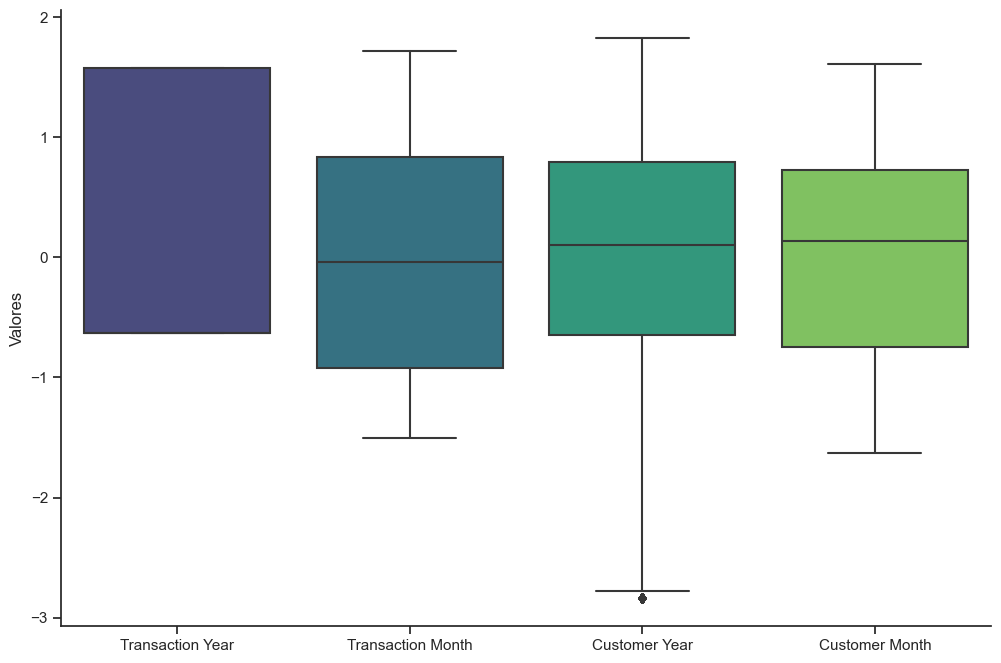

In [60]:
sns.set(style = "ticks")

plt.figure(figsize = (12, 8))
sns.boxplot(data = Time, palette = "viridis")

plt.ylabel('Valores')

sns.despine()

plt.savefig('time.png')
plt.show()

#### <font color = #696969>**Concatenate Data**</font>

In [61]:
ZData = pd.concat([Time, Numerical, Categorical], axis = 1)

In [62]:
YData = YData.to_frame()

In [63]:
MData = pd.concat([ZData, YData], axis = 1)

In [64]:
MData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1296675 entries, 0 to 1296674
Data columns (total 55 columns):
 #   Column                                                      Non-Null Count    Dtype  
---  ------                                                      --------------    -----  
 0   Transaction Year                                            1296675 non-null  float64
 1   Transaction Month                                           1296675 non-null  float64
 2   Customer Year                                               1296675 non-null  float64
 3   Customer Month                                              1296675 non-null  float64
 4   Amount                                                      1296675 non-null  float64
 5   Postal Code                                                 1296675 non-null  float64
 6   Latitude                                                    1296675 non-null  float64
 7   Longitude                                                   129

### Random Under-Sampling

In [65]:
print('No Frauds: ' , round(YData['is_fraud'].value_counts()[0]))
print('   Frauds:  ', round(YData['is_fraud'].value_counts()[1]))

No Frauds:  1289169
   Frauds:   7506


In [66]:
from imblearn.under_sampling import RandomUnderSampler

US = RandomUnderSampler(sampling_strategy = 1.0, random_state = 42)

XResampled, YResampled = US.fit_resample(MData.drop('is_fraud', axis = 1), MData['is_fraud'])

Resampled = pd.concat([pd.DataFrame(XResampled, columns = MData.drop('is_fraud', axis = 1).columns),
                         pd.Series(YResampled, name = 'is_fraud')], axis = 1)

print(Resampled['is_fraud'].value_counts())

0    7506
1    7506
Name: is_fraud, dtype: int64


In [67]:
Resampled

,Transaction Year,Transaction Month,Customer Year,Customer Month,Amount,Postal Code,Latitude,Longitude,Population City,Merch Lat,...,Occupation_Performing arts and media,"Occupation_Print and publishing, marketing and advertising",Occupation_Retail and customer services,"Occupation_Science, mathematics and statistics","Occupation_Security, uniformed and protective services",Occupation_Social sciences and religion,Occupation_Social work and caring services,Occupation_Sport and leisure,"Occupation_Transport, distribution and logistics",is_fraud
0,-0.634065,1.713973,-0.705324,-0.743537,0.719839,1.442557,-0.789959,-1.595714,1.053731,-0.962569,...,0,0,0,0,0,0,0,0,0,0
1,1.577126,-0.626781,0.330440,-1.626513,0.714077,0.444569,-0.407805,-0.145366,-0.499182,-0.439885,...,0,0,0,0,0,0,0,0,0,0
2,-0.634065,1.713973,-1.626003,1.316742,0.902209,-1.092434,0.136101,0.735046,-1.494823,0.045697,...,0,0,0,0,0,0,0,0,0,0
3,-0.634065,-0.041592,-0.072357,-0.449211,-0.100316,0.313674,2.152199,-1.369464,-0.670542,2.225348,...,0,0,0,0,0,0,0,0,0,0
4,-0.634065,-0.626781,0.790780,-1.332188,-1.267677,-0.279803,-0.435339,0.388984,1.033885,-0.350842,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15007,1.577126,-0.041592,0.733237,-0.449211,2.576001,-0.449222,-2.024806,0.632776,1.102415,-2.186875,...,0,0,0,0,0,0,0,0,0,1
15008,1.577126,-0.041592,0.733237,-0.449211,2.579107,-0.449222,-2.024806,0.632776,1.102415,-1.889001,...,0,0,0,0,0,0,0,0,0,1
15009,1.577126,-0.041592,1.193577,-0.449211,-0.647527,0.623946,-1.498742,-0.235178,0.970779,-1.664423,...,0,0,0,0,0,0,0,0,0,1
15010,1.577126,-0.041592,-0.244984,0.728091,-0.425060,1.071021,-1.269869,-1.018164,-5.199338,-1.092934,...,0,0,0,1,0,0,0,0,0,1


In [68]:
from scipy.stats import chi2_contingency

Matriz = np.array([[1289169, 7506], [7506, 7506]])

stat, p, _, _ = chi2_contingency(Matriz)

print(f"Estadístico chi-cuadrado: {stat}")
print(f"Valor p: {p}")

if p < 0.05:
    print("Se rechaza la hipótesis nula. Hay una diferencia significativa.")
else:
    print("No se puede rechazar la hipótesis nula. No hay evidencia suficiente para afirmar una diferencia significativa.")

Estadístico chi-cuadrado: 320329.1228044641
Valor p: 0.0
Se rechaza la hipótesis nula. Hay una diferencia significativa.


## <font color = #0e46a1>**Data Depuration**</font>

### First Review

In [69]:
XData = Resampled.copy().drop(['is_fraud'], axis = 1)
YData = Resampled['is_fraud'].copy()

#### <font color = #696969>**Multicollinearity Test**</font>

In [70]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [71]:
def Multicollinearity(XData):
    
    VIF = pd.DataFrame()
    
    VIF["Variable"] = XData.columns
    VIF["VIF"]      = [variance_inflation_factor(XData.values, i) for i in range(XData.shape[1])]
    
    M = pd.DataFrame(VIF, columns = ['Variable', 'VIF'])
    M = M.round(5)
    
    return M

In [72]:
MT = Multicollinearity(XData)
MT

,Variable,VIF
0,Transaction Year,1.24411
1,Transaction Month,1.25315
2,Customer Year,1.05654
3,Customer Month,1.03945
4,Amount,2.13533
5,Postal Code,13.44198
6,Latitude,48.53951
7,Longitude,90.67235
8,Population City,1.16764
9,Merch Lat,48.89593


#### <font color = #696969>**Principal Components Analysis**</font>

In [73]:
from sklearn.decomposition import PCA

In [74]:
def Dimensionality_Reduction(XTrain):
    
    pCA = PCA().fit(XTrain)
    
    Cumulative = np.cumsum(pCA.explained_variance_ratio_)
    Dimensions = np.argmax(Cumulative >= 0.95) + 1
    Dimensions

    Dimensions = int(Dimensions)
    
    Principal_Components_Analysis = PCA(n_components = Dimensions)
    
    VIF_Data_PCA = Principal_Components_Analysis.fit_transform(XTrain)
   
    return VIF_Data_PCA

In [75]:
C = ['Postal Code', 'Latitude', 'Longitude', 'Merch Lat', 'Merch Long']

VIF_Data = XData[C]

In [76]:
VIF_Data_PCA = Dimensionality_Reduction(VIF_Data)

In [77]:
Columns = ['Column_A', 'Column_B']

In [78]:
VIF_Data_PCA_1 = pd.DataFrame(VIF_Data_PCA, columns = Columns)
VIF_Data_PCA_1

,Column_A,Column_B
0,2.745052,-1.065722
1,0.459877,-0.585178
2,-1.548066,0.017844
3,1.528159,3.207875
4,-0.612889,-0.611879
...,...,...
15007,-0.774913,-3.049925
15008,-0.855534,-2.845764
15009,0.796628,-2.203922
15010,1.899463,-1.558943


In [79]:
Drop = ['Postal Code', 'Latitude', 'Longitude', 'Merch Lat', 'Merch Long']
XData_Drop = XData.drop(Drop, axis = 1)
XData_Drop

,Transaction Year,Transaction Month,Customer Year,Customer Month,Amount,Population City,Category_Food,Category_Grocery_Net,Category_Grocery_Pos,Category_Health,...,Occupation_Manufacturing and production,Occupation_Performing arts and media,"Occupation_Print and publishing, marketing and advertising",Occupation_Retail and customer services,"Occupation_Science, mathematics and statistics","Occupation_Security, uniformed and protective services",Occupation_Social sciences and religion,Occupation_Social work and caring services,Occupation_Sport and leisure,"Occupation_Transport, distribution and logistics"
0,-0.634065,1.713973,-0.705324,-0.743537,0.719839,1.053731,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1.577126,-0.626781,0.330440,-1.626513,0.714077,-0.499182,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,-0.634065,1.713973,-1.626003,1.316742,0.902209,-1.494823,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
3,-0.634065,-0.041592,-0.072357,-0.449211,-0.100316,-0.670542,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,-0.634065,-0.626781,0.790780,-1.332188,-1.267677,1.033885,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15007,1.577126,-0.041592,0.733237,-0.449211,2.576001,1.102415,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
15008,1.577126,-0.041592,0.733237,-0.449211,2.579107,1.102415,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
15009,1.577126,-0.041592,1.193577,-0.449211,-0.647527,0.970779,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
15010,1.577126,-0.041592,-0.244984,0.728091,-0.425060,-5.199338,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0


In [80]:
Nuevo = pd.concat([VIF_Data_PCA_1, XData_Drop], axis = 1)
Nuevo

,Column_A,Column_B,Transaction Year,Transaction Month,Customer Year,Customer Month,Amount,Population City,Category_Food,Category_Grocery_Net,...,Occupation_Manufacturing and production,Occupation_Performing arts and media,"Occupation_Print and publishing, marketing and advertising",Occupation_Retail and customer services,"Occupation_Science, mathematics and statistics","Occupation_Security, uniformed and protective services",Occupation_Social sciences and religion,Occupation_Social work and caring services,Occupation_Sport and leisure,"Occupation_Transport, distribution and logistics"
0,2.745052,-1.065722,-0.634065,1.713973,-0.705324,-0.743537,0.719839,1.053731,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0.459877,-0.585178,1.577126,-0.626781,0.330440,-1.626513,0.714077,-0.499182,0,0,...,0,0,0,0,0,0,0,0,0,0
2,-1.548066,0.017844,-0.634065,1.713973,-1.626003,1.316742,0.902209,-1.494823,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1.528159,3.207875,-0.634065,-0.041592,-0.072357,-0.449211,-0.100316,-0.670542,0,0,...,0,0,0,0,0,0,0,0,0,0
4,-0.612889,-0.611879,-0.634065,-0.626781,0.790780,-1.332188,-1.267677,1.033885,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15007,-0.774913,-3.049925,1.577126,-0.041592,0.733237,-0.449211,2.576001,1.102415,0,0,...,0,0,0,0,0,0,0,0,0,0
15008,-0.855534,-2.845764,1.577126,-0.041592,0.733237,-0.449211,2.579107,1.102415,0,0,...,0,0,0,0,0,0,0,0,0,0
15009,0.796628,-2.203922,1.577126,-0.041592,1.193577,-0.449211,-0.647527,0.970779,0,0,...,0,0,0,0,0,0,0,0,0,0
15010,1.899463,-1.558943,1.577126,-0.041592,-0.244984,0.728091,-0.425060,-5.199338,0,0,...,0,0,0,0,1,0,0,0,0,0


#### <font color = #696969>**Correlation between variables**</font>

In [81]:
def Correlation(XData, File):
    
    Kendall  = XData.corr(method = 'kendall')
    Spearman = XData.corr(method = 'spearman')
    
    Kendall.to_csv(File + " Kendall.csv")
    Spearman.to_csv(File + " Spearman.csv")

In [82]:
SCorrelation = Correlation(Nuevo, "Correlation")

In [83]:
def Conditional(XData, File):
    
    Kendall  = XData.corr(method = 'kendall')
    Spearman = XData.corr(method = 'spearman')
    
    K = Kendall[(abs(Kendall) > 0.1)  & (abs(Kendall) != 1)]
        
    S = Spearman[(abs(Spearman) > 0.1) & (abs(Spearman) != 1)]
            
    K.to_csv(File + " Kendall.csv")
    S.to_csv(File + " Spearman.csv")
    
    return K,S

In [84]:
SConditional = Conditional(Nuevo, "Conditional")

### Second Review

#### <font color = #696969>**Multicollinearity Test**</font>

In [85]:
MT = Multicollinearity(Nuevo)
MT

,Variable,VIF
0,Column_A,6.22562
1,Column_B,2.30918
2,Transaction Year,1.24282
3,Transaction Month,1.25246
4,Customer Year,1.05428
5,Customer Month,1.03693
6,Amount,2.13380
7,Population City,1.16327
8,Category_Food,1.37825
9,Category_Grocery_Net,1.23367


#### <font color = #696969>**Correlation between variables**</font>

In [86]:
SData = pd.concat([Nuevo, YData], axis = 1)

In [87]:
SCorrelation = Correlation(SData, "Depurated Correlation")

In [88]:
SConditional = Conditional(SData, "Depurated Conditional")

## <font color = #0e46a1>**Serialize Data**</font>

In [89]:
import json

In [90]:
OData = OData.to_json()
MData = MData.to_json()
SData = SData.to_json()

#### <font color = #696969>**Save Data**</font>

In [91]:
with open('Original Data.json', 'w') as f:
    json.dump(OData, f)

In [92]:
with open('Modified Data.json', 'w') as f:
    json.dump(MData, f)

In [93]:
with open('Sample Data.json', 'w') as f:
    json.dump(SData, f)